# TDCOSMO measurement comparison
This notebook generates a plot to compare the different measurements of the TDCOSMO collaboration. The notebook is adopted from the [H0 tension notebook by Bonvin and Millon](https://github.com/shsuyu/H0LiCOW-public/blob/master/H0_tension_plots/H0_tension.ipynb).

In [1]:
import matplotlib.pyplot as plt
measurement_list = []

## PL or  NFW + stars/constant M/L
Previous measurements of the TDCOSMO/H0LiCOW collaboration by
[Wong et al. 2020](https://ui.adsabs.harvard.edu/abs/2020MNRAS.tmp.1661W/abstract)
and
[Millon et al. 2020](https://ui.adsabs.harvard.edu/abs/2019arXiv191208027M/abstract).

In [2]:
label_h0licow = 'H0LiCOW (average of PL and NFW + stars/constant M/L)'
h0licow_median, h0licow_low, h0licow_up = 73.3, 1.8, 1.7
measurement_list.append([label_h0licow, h0licow_median, h0licow_low, h0licow_up])


label_nfw_stars = 'TDCOSMO (NFW + stars/constant M/L)'
nfw_stars_median, nfw_stars_low, nfw_stars_up = 74.0, 1.8, 1.7
measurement_list.append([label_nfw_stars, nfw_stars_median, nfw_stars_low, nfw_stars_up])


label_pl = 'TDCOSMO (power-law)'
pl_median, pl_low, pl_up = 74.2, 1.6, 1.6
measurement_list.append([label_pl, pl_median, pl_low, pl_up])



## Hierarchical analysis with MST (this work)

In [3]:


label_mst_tdcosmo = 'TDCOSMO-only'
mst_tdcosmo_median, mst_tdcosmo_low, mst_tdcosmo_up = 74.5, 6.1, 5.6
measurement_list.append([label_mst_tdcosmo, mst_tdcosmo_median, mst_tdcosmo_low, mst_tdcosmo_up])

label_mst_tdcosmo_ifu = r'TDCOSMO+SLACS$_{\rm IFU}$ (anisotropy constraints from 9 SLACS lenses)'
mst_tdcosmo_ifu_median, mst_tdcosmo_ifu_low, mst_tdcosmo_ifu_up = 73.3, 5.8, 5.8
measurement_list.append([label_mst_tdcosmo_ifu, mst_tdcosmo_ifu_median, mst_tdcosmo_ifu_low, mst_tdcosmo_ifu_up])

label_mst_tdcosmo_slacs = r'TDCOSMO+SLACS$_{\rm SDSS}$ (profile constraints from 33 SLACS lenses)' # ; self-similarity between samples)'
mst_tdcosmo_slacs_median, mst_tdcosmo_slacs_low, mst_tdcosmo_slacs_up = 67.4, 4.7, 4.3
measurement_list.append([label_mst_tdcosmo_slacs, mst_tdcosmo_slacs_median, mst_tdcosmo_slacs_low, mst_tdcosmo_slacs_up])

label_mst_tdcosmo_slacs_ifu = r'TDCOSMO+SLACS$_{\rm SDSS+IFU}$ (anisotropy and profile constraints from SLACS)' #; self-similarity between samples)'
mst_tdcosmo_slacs_ifu_median, mst_tdcosmo_slacs_ifu_low, mst_tdcosmo_slacs_ifu_up = 67.4, 3.2, 4.1
measurement_list.append([label_mst_tdcosmo_slacs_ifu, mst_tdcosmo_slacs_ifu_median, mst_tdcosmo_slacs_ifu_low, mst_tdcosmo_slacs_ifu_up])



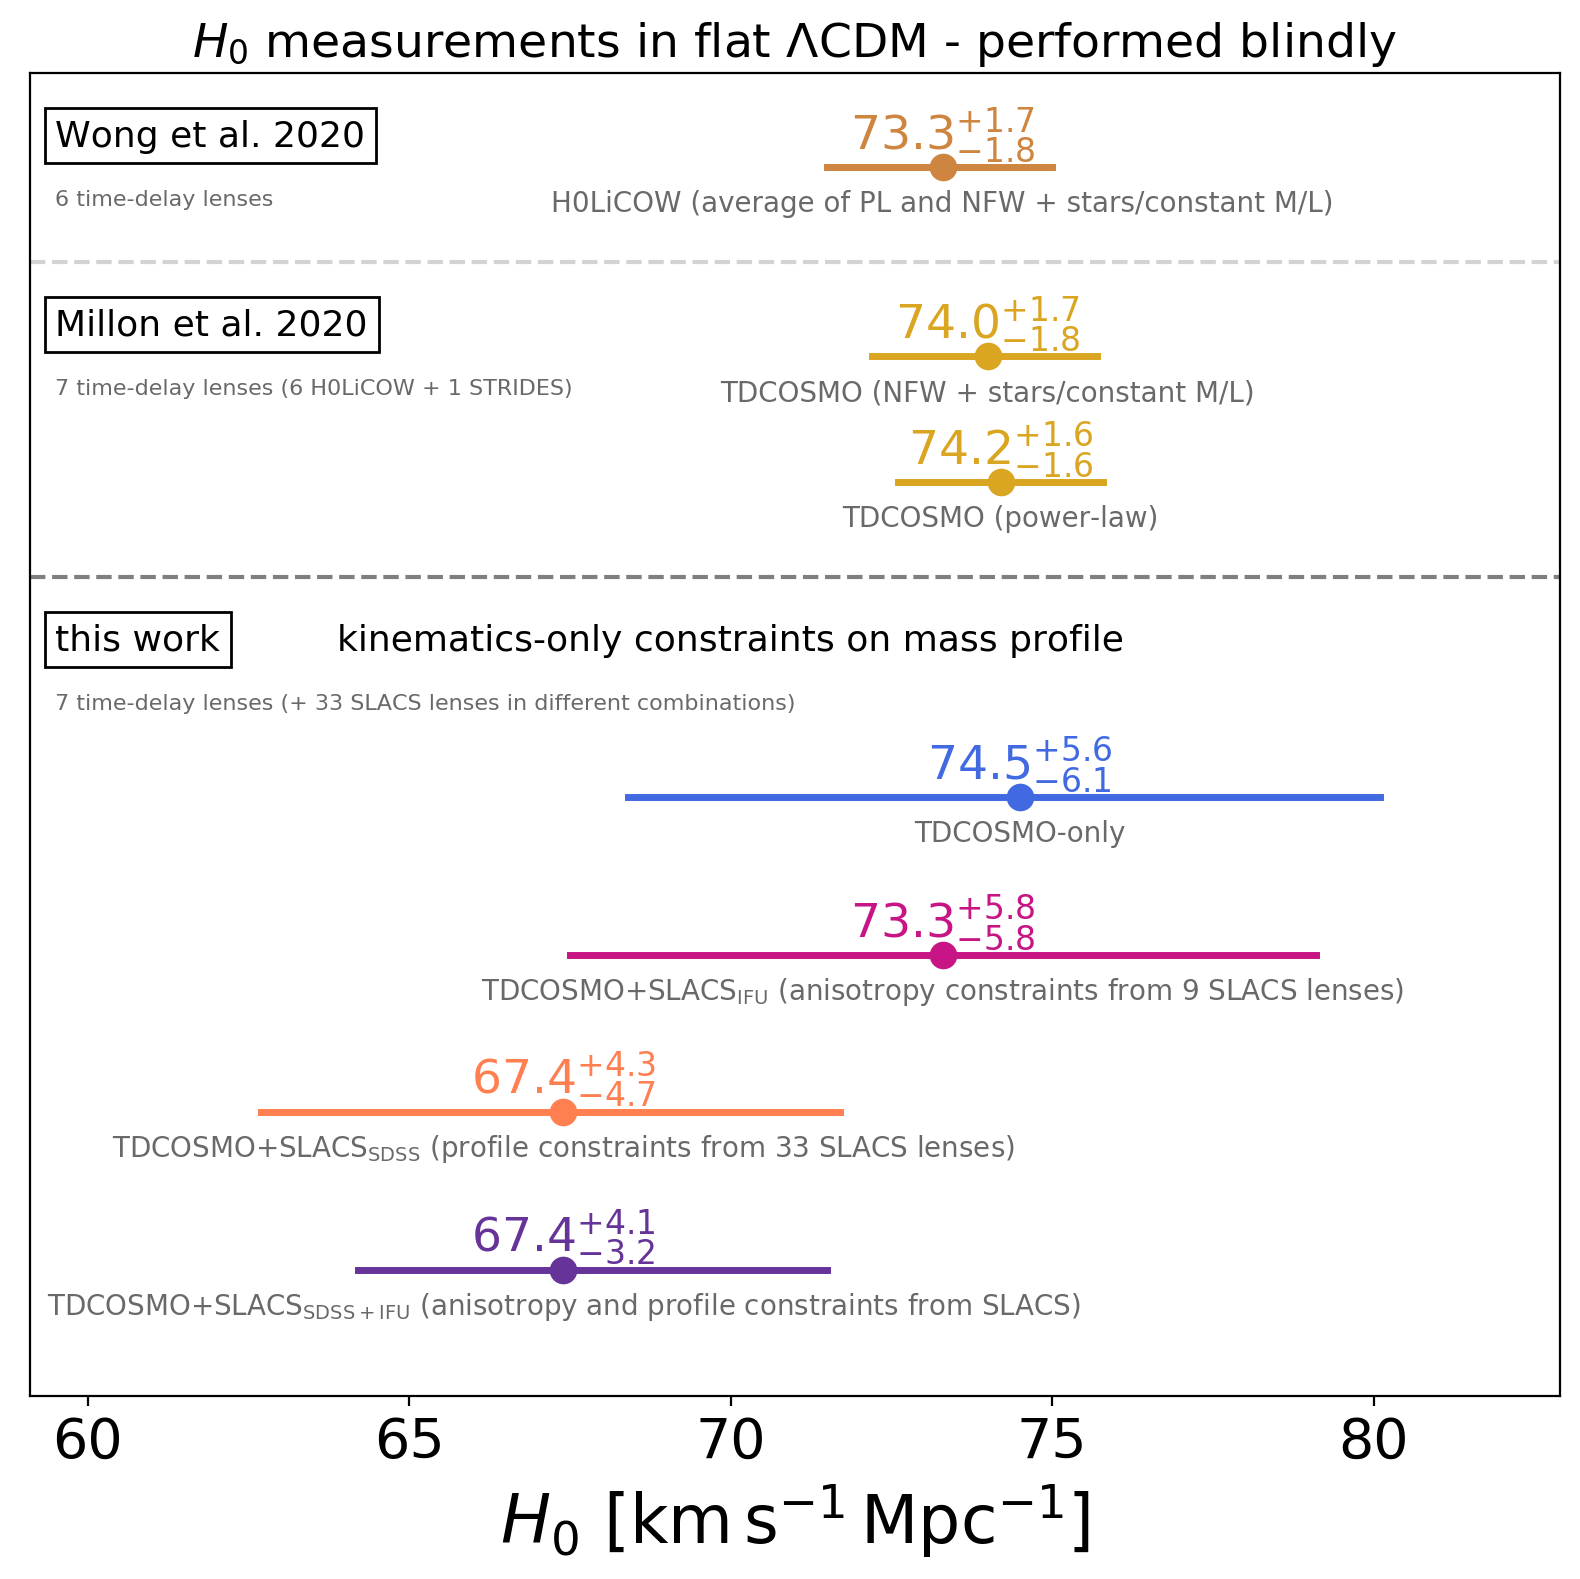

In [4]:

# Special fine-tuned design, adapted from Bonvin & Millon notebook

ys = [14, 11, 9, 4, 1.5, -1, -3.5]

plt.figure(figsize=(8.0, 8), dpi=200)
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.20, top=0.92)

ax = plt.subplot(1, 1, 1)
plt.xlabel(r"$H_0\rm{\ [km\,s^{-1}\,Mpc^{-1}]}$", fontsize=24)
plt.yticks(fontsize=14)
plt.xticks(fontsize=20)


colors = ['peru', 'goldenrod', 'goldenrod','royalblue', 'mediumvioletred', 'coral', 'rebeccapurple', 'crimson','crimson','purple','purple']


plt.axis([59.1, 82.9, -5.5, 15.5]) # 75.6
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.title(r'$H_0$ measurements in $\rm{flat\,\, \Lambda CDM}$ - performed blindly', fontsize=17)


for x, y, c in zip(measurement_list, ys, colors):
    pcs = [x[1]-x[2], x[1], x[1]+x[3]]
    label = x[0]
    plt.scatter(pcs[1], y, s=80, edgecolor=c, c=c, label=label)
    plt.plot([pcs[0], pcs[2]], [y, y], linewidth=2.5, color=c)

    delaytext = r"$%.1f^{+%.1f}_{-%.1f}$" % (pcs[1], pcs[2]-pcs[1], pcs[1]-pcs[0])
    plt.annotate(delaytext, xy=(pcs[1], y + 0.3), color = c, horizontalalignment="center", fontsize=17)
    plt.annotate(label, xy=(pcs[1], y-0.7), color = "dimgrey", horizontalalignment="center", fontsize=10) 

    
plt.axhline(12.5, color="darkgrey", ls='--', alpha=0.5)  
plt.axhline(7.5, color="k", ls='--', alpha=0.5)  

bbox_props = dict(boxstyle="square", lw=1,  fc="white")
plt.annotate("Wong et al. 2020", xy=(59.5, 14.5), color = "black", 
             horizontalalignment="left", verticalalignment="center", fontsize=13, bbox=bbox_props)
plt.annotate("6 time-delay lenses", xy=(59.5, 13.5), color = "dimgrey", 
             horizontalalignment="left", verticalalignment="center", fontsize=8)

plt.annotate("Millon et al. 2020", xy=(59.5, 11.5), color = "black", 
             horizontalalignment="left", verticalalignment="center", fontsize=13, bbox=bbox_props)
plt.annotate("7 time-delay lenses (6 H0LiCOW + 1 STRIDES)", xy=(59.5, 10.5), color = "dimgrey", 
             horizontalalignment="left", verticalalignment="center", fontsize=8)
plt.annotate("this work", xy=(59.5, 6.5), color = "black", 
             horizontalalignment="left", verticalalignment="center", fontsize=13, bbox=bbox_props)
plt.annotate("7 time-delay lenses (+ 33 SLACS lenses in different combinations)", xy=(59.5, 5.5), color = "dimgrey", 
             horizontalalignment="left", verticalalignment="center", fontsize=8)
plt.annotate("kinematics-only constraints on mass profile", xy=(70, 6.5), color = "black", 
             horizontalalignment="center", verticalalignment="center", fontsize=13)

    
plt.tight_layout()
#plt.savefig('/Users/sibirrer/Science/Projects/TDCOSMO/hierarchy_paper/Figures/h0_comparison.pdf')
plt.show()